We want to see the **trend of transportation** for travelling in Europe for the last five years.

## Import libraries

In [477]:
import pandas as pd
pd.set_option("display.max_rows", 101)

## Data preprocessing

In [543]:
# read original data from csv file
ori_data = pd.read_csv('data/tour_dem_tttr_1_Data.csv')
ori_data

,TIME,GEO,UNIT,PURPOSE,DURATION,PARTNER,TRA_MODE,Value,Flag and Footnotes
0,2014,Belgium,Number,Total,1 night or over,Domestic,Total,"2,253,573",NaN
1,2014,Belgium,Number,Total,1 night or over,Domestic,Air,:,NaN
2,2014,Belgium,Number,Total,1 night or over,Domestic,Land,"2,250,733",NaN
3,2014,Belgium,Number,Total,1 night or over,Domestic,Railways,"192,750",NaN
4,2014,Belgium,Number,Total,1 night or over,Domestic,"Bus, coach","47,937",u
...,...,...,...,...,...,...,...,...,...
26455,2018,Switzerland,Number,"Professional, business",4 nights or over,All countries of the world,Land,"136,167",u
26456,2018,Switzerland,Number,"Professional, business",4 nights or over,All countries of the world,Railways,:,c
26457,2018,Switzerland,Number,"Professional, business",4 nights or over,All countries of the world,"Bus, coach",:,c
26458,2018,Switzerland,Number,"Professional, business",4 nights or over,All countries of the world,Motor vehicle,:,c


In [518]:
# rename columns
ori_data.columns = ['Time', 'Country', 'Unit', 'Purpose', 'Duration', 'Partner', 'Transportation', 'NumTrip', 'Flag']

In [519]:
# remove rows with missing NumTrip
data = ori_data[ori_data.NumTrip != ":"]
data.head()

,Time,Country,Unit,Purpose,Duration,Partner,Transportation,NumTrip,Flag
0,2014,Belgium,Number,Total,1 night or over,Domestic,Total,"2,253,573",NaN
2,2014,Belgium,Number,Total,1 night or over,Domestic,Land,"2,250,733",NaN
3,2014,Belgium,Number,Total,1 night or over,Domestic,Railways,"192,750",NaN
4,2014,Belgium,Number,Total,1 night or over,Domestic,"Bus, coach","47,937",u
5,2014,Belgium,Number,Total,1 night or over,Domestic,Motor vehicle,"1,993,400",NaN


In [520]:
# make NumTrip to int
data['NumTrip'] = data['NumTrip'].apply(lambda x: int(x.replace(",", "")))
data.head()

C:\Users\clair\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Data exploration

We want to see the trend of transportation for travelling in Europe for the last five years. \
Starting by exploring the data, we want to see whether people use **airplane** more frequently now compared with past. \
We will generalize the question to all other kinds of transportation in the next milestone. \
Our assumption to the question is yes.

In [523]:
# data_total => all columns with category refers to the sum of NumTrip
data_total = data[data.Purpose == "Total"]
data_total = data_total[data_total.Duration == "1 night or over"]
data_total = data_total[data_total.Partner == "All countries of the world"]

In [524]:
data_total

,Time,Country,Unit,Purpose,Duration,Partner,Transportation,NumTrip,Flag
14,2014,Belgium,Number,Total,1 night or over,All countries of the world,Total,13031273,NaN
15,2014,Belgium,Number,Total,1 night or over,All countries of the world,Air,3962198,NaN
16,2014,Belgium,Number,Total,1 night or over,All countries of the world,Land,8977574,NaN
17,2014,Belgium,Number,Total,1 night or over,All countries of the world,Railways,839525,NaN
18,2014,Belgium,Number,Total,1 night or over,All countries of the world,"Bus, coach",562748,NaN
...,...,...,...,...,...,...,...,...,...
26287,2018,Switzerland,Number,Total,1 night or over,All countries of the world,Land,14911363,NaN
26288,2018,Switzerland,Number,Total,1 night or over,All countries of the world,Railways,3665052,NaN
26289,2018,Switzerland,Number,Total,1 night or over,All countries of the world,"Bus, coach",625409,NaN
26290,2018,Switzerland,Number,Total,1 night or over,All countries of the world,Motor vehicle,10541815,NaN


In [546]:
# data_total_total => NumTrip by all kinds of transportation in data_total dataframe
data_total_total = data_total[data_total.Transportation == "Total"]
data_total_total.shape

(138, 9)

In [545]:
# data_air => NumTrip by "air" only in data_total dataframe
data_air = data_total[data_total.Transportation == "Air"]
data_air.shape

(138, 9)

In [529]:
data_air_sum = data_air.groupby('Time').NumTrip.agg('sum')

In [530]:
data_air_sum

Time
2014    145012772
2015    143818376
2016    154376514
2017    170506158
2018    196369808
Name: NumTrip, dtype: int64

In [531]:
data_total_sum = data_total_total.groupby('Time').NumTrip.agg('sum')

In [532]:
data_total_sum

Time
2014    1028189581
2015    1015389696
2016    1047258292
2017    1082257223
2018    1049299929
Name: NumTrip, dtype: int64

In [533]:
data_air_vs_total = pd.concat([data_total_sum, data_air_sum], axis=1)

In [534]:
data_air_vs_total.columns = ['Total', 'Air']

In [535]:
data_air_vs_total

,Total,Air
Time,,
2014,1028189581,145012772
2015,1015389696,143818376
2016,1047258292,154376514
2017,1082257223,170506158
2018,1049299929,196369808


In [536]:
data_air_vs_total['Percentage'] = data_air_vs_total.apply(lambda row: row['Air'] / row['Total'], axis=1)

In [537]:
data_air_vs_total

,Total,Air,Percentage
Time,,,
2014,1028189581,145012772,0.141037
2015,1015389696,143818376,0.141639
2016,1047258292,154376514,0.147410
2017,1082257223,170506158,0.157547
2018,1049299929,196369808,0.187144


## Date visualization

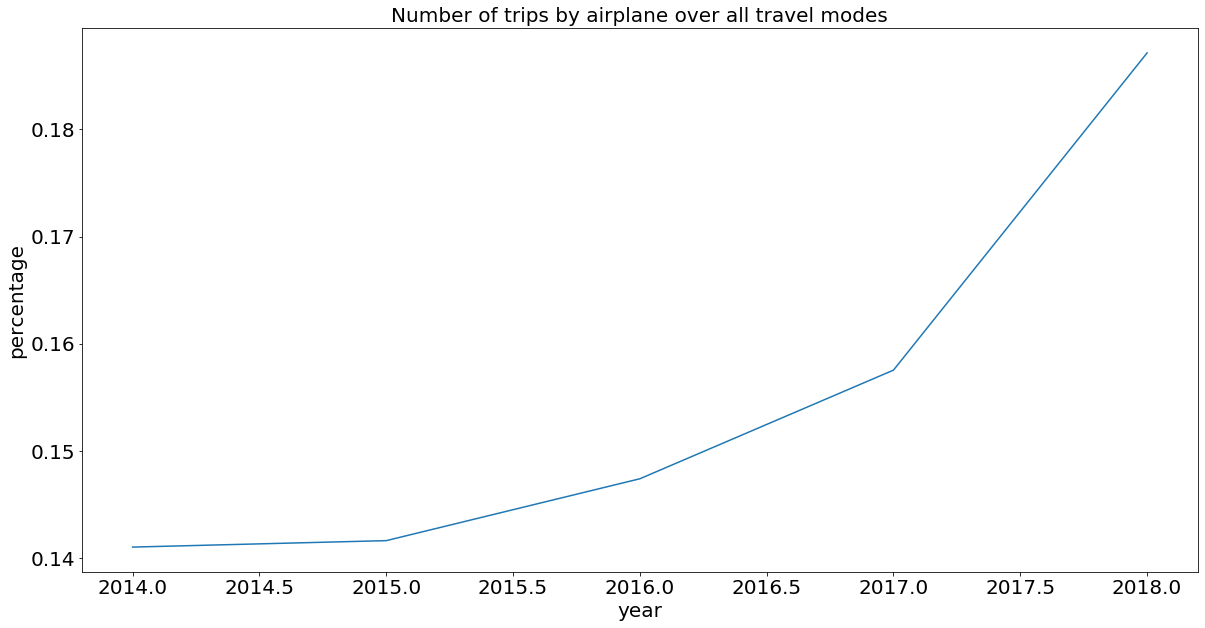

In [539]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(data_air_vs_total.Percentage)
plt.xlabel("year", fontsize=20)
plt.ylabel("percentage", fontsize=20)
plt.title("Number of trips by airplane over all travel modes", fontsize=20)
plt.show()

## What to do in the next milestone
* Analyze trips in Europe by means of all transportations (not only by airplane)
* Analyze the trend of trip purpose (personal vs business, etc)

In [540]:


# data_transportation_sum_by_year = data_countries.groupby(['TIME']).Value.agg('sum')

# data_transportation = data_countries.groupby(['TIME', 'TRA_MODE']).apply(lambda x: sum(x.Value))

# data_transportation

# all_tra_mode_sum = [x.iloc[0].Value + x.iloc[1].Value + x.iloc[2].Value for x in data_transportation]

# for i in range(2014, 2019):
#     all_tra_mode_sum.append()

# data_transportation_list = []
# for year in range(2014, 2019):
#     data_year = data_countries[data_countries.TIME == year]
#     data_year_transportation = data_year.groupby('TRA_MODE').apply(lambda x: sum(x.Value))
#     data_year_transportation_df = data_year_transportation.to_frame()
#     data_year_transportation_df = data_year_transportation_df.rename(columns={0:'Value'})
# #     data_year_transportation_df['Percentage'] = data_year_transportation_df['Value'].apply(lambda x: 100 * x / data_transportation_sum_by_year.values[year - 2009])    
#     data_transportation_list.append(data_year_transportation_df)



# air_values = [x.iloc[0].Value for x in data_transportation_list]

# air_values

